Particle kinematics in steep and breaking waves
------

In this notebook, we will examine particle kinematics in steep and breaking waves. We will study several properties of these waves as they focus and break, including particle velocities and accelerations, as well as the phase velocity. We're also interested in the spatial distribution of these quantities. That is, how does the ratio of the horizontal velocity, divided by the phase velocity, at the crest compare with that at the steepest part of the wave? 

Here, we list some specific goals of this study
-------------
* Better understand the kinematic breaking criteria. Why does it work? Is it related to a fundamental property of surface waves (i.e. an instability)? 

* Better understand the relationship between bandwidth, slope, and wave breaking. This can include geometric and kinematic criteria. 

* Better understand the relationship between bandwidth, slope, and $h$, the height of the wave at breaking. 

* Better understand kinematics at breaking, including the velocity and acceleration. How do these variables relate to the packet bandwidth and slope? 

Background
----------
We should start with some definitions. 

We let $(x,y)$ define the horizontal and vertical axis, with their associated velocities being $(u,v)$. The velocity field may be defined in the $\textbf{Eulerian}$ framework, in which it is evaluated at a point in space, or the $\textbf{Lagrangian}$ framework, in which it is defined for a fluid particle, which was at location $(x_0,y_0)$ at $t=0$. 

The phase velocity is defined as the speed at which a fixed phase of the wave is traveling. This could, for example, be the crest of the wave. However, as the wave steepens, different phases of the wave travel at different speeds, and the notion of the phase may even break down at wave breaking. Then, we seek a more geometric defintion. Longuet-Higgins sorted this out in 1957. If we track the crest of the wave, with wave height $\eta$, then the speed at which the tallest part of the wave, i.e. the crest, moves is given by
$$ \frac{d\eta_x}{dt} =0 = \eta_{xt}+c_m\eta_{xx},$$
from which the phase velocity of the maximum height $c_m$ may be extracted. Similarly, if we were instead interested in the speed at which the steepest part of the wave travelled, we would find $c_s$ through the relationship 
$$ \frac{d\eta_{xx}}{dt} =0=\eta_{xxt}+c_s\eta_{xxx}.$$

In general, we expect $c_{m} \neq c_{s}$.

Is there a good example that explicitly shows when $c_m \neq c_s$? This should fall out of linear theory, and is likely most simply described for narrow banded waves. 

Let's take a very simple example where $$\eta = \sum_n a_n \cos \theta_n,$$
where $\theta_n = k_n x- \omega_t$ and $\omega_n^2= gk_n$. Then 
$$c_m = \frac{\sum k_n\omega_n \cos \theta_n}{\sum k_n^2 \cos \theta_n}.$$
A critical point occurs when both numerator and denominator have minima, which occurs at $x=t=0$, so that there is a critical point (this turns out to be a minima) at $x=t=0$, and the phase velocity here is given by
$$min(c_m)=\frac{\sum a_nk_n\omega_n}{\sum a_n k_n^2 }.$$

Meanwhile, if we did the same thing for minimum speed of the maximum slope, we have 
$$min(c_s) = \frac{\sum a_nk_n^2\omega_n}{\sum a_n k_n^3 }.$$

The value of these two functions may be easily compared, based on the functional form of the wave packet. Note, for monochromatic waves, i.e. those with one wave component, the two definitions are equivalent.  

Of equal is interest is the propagation characteristics of these critical points. That is, how does $c_m$ evolve? This is a messier question. 

We can do the same thing with the fluid velocity at these points, given by derivatives of 

$$\phi =\sum a_n \omega_n /k_n \sin \theta_n.$$

Then, $$u=\phi_x = \sum a_n \omega_n \cos \theta_n,$$
which is largest at $x=t=0$ and coincides with the critical point (a minima) of $c_m$ at that location. Their ratio is then 
$$ max\left(\frac{u}{c_m} \right) = \sum a_n \omega_n\frac{\sum a_n k_n^2}{\sum a_n k_n\omega_n }.$$


Note the limiting behavior for 1 wave, whence we return the linear prediction that this ratio is $a_0k_0$. Good! What's the scaling as a function of bandwidth and slope? 

It's not obvious how to evaluate $u$ at the steepest part of the wave. 

We next ask ourselves the question of what relevance this parameter has in predicting breaking? For monochromatic waves, it's closely related to wave slope, as we've seen. Then, it's likely related with the superharmonic instability of surface waves, which rapidly leads to wave over turning. 


Numerics
------------
To this end, we will examine these kinematics by integrating the fully nonlinear potential flow equations. The dependent variables of the system are the particle positions $(x,y)$, and the velocity potential $\phi$. 

The numerical scheme is due to Dold (1991). The boundary conditions are assumed to be periodic, and we work in infinitely deep water. 

We would like to begin by validating some of our processing. This is most easily done by considering a periodic wave. 

In [11]:
imatlab_export_fig('print-png')

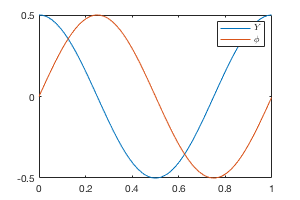

In [3]:
%% Begin Matlab code 
cd /Users/airsealab/Documents/github/ParticleKinematics//
%
N = 512; % number of spectral modes
ML = 2*pi;
wl = 2*pi;
g = 1; 
xi = 0:1/N:1-1/N; 
x = xi;
% a=0.275;
a = 0.5;
y = a*cos(2*pi*xi);
f = a*sin(2*pi*xi);
xi2 = 0:max(xi)/(N-1):max(xi);
xx = interp1(xi,x,xi2)';
% look at initial conditions
clf
yy = interp1(x,y,xx);
ff = interp1(x,f,xx);
clf
p1 = plot(xx,yy);
hold on
p2 = plot(xx,ff);
x3 = xx*2*pi;
l1 = legend([p1 p2],'$Y$','$\phi$');
set(l1,'interpreter','latex')
set(gcf, 'Position',  [100, 100, 300, 200])
set(gcf,'color','w');

Now execute the code

In [4]:
%%
tl=15;
delete xc.txt
delete yc.txt 
delete fc.txt 
delete bw.txt
delete wl.txt
delete S.txt
% delete k.txt
BW=1;
% save xc.txt x_f -ascii
% save yc.txt y_f -ascii
% save fc.txt f_f -ascii
save xc.txt x3 -ascii
save yc.txt yy -ascii
save fc.txt ff -ascii
save S.txt a -ascii
save bw.txt BW -ascii
save tl.txt tl -ascii
save wl.txt wl -ascii 
% save k.txt k -ascii
unix('./run2.sh'); 

dold.f:291:21:

       common /profil/ x(-6:N7),y(-6:N7),f(-6:N7),
                     1
   0.0000000000000000     
   3.7001573218806955E-002
  0.14200998675815213     
  0.24581641606629728     
  0.34445528678017528     
  0.43530092103539242     
  0.50000000028566660     
  0.55752925007961451     
  0.59144945386571879     
  0.62249855299466628     
  0.65245413252573148     
  0.68563830162553752     
  0.72266277288082914     
  0.75812936840157974     
  0.80061219181360210     
  0.84828977807990202     
  0.90127955702453710     
  0.96056903949203609     
   1.0000000005713332     
   1.0632968344709051     
   1.1199067452805025     
   1.1646750731018343     
   1.2000101106440109     
   1.2319427576852133     
   1.2536364865676635     
   1.2714041626035064     
   1.2849610693551337     
   1.2992873151117503     
   1.3106087185935320     
   1.3216112953653865     
   1.3308708924429427     
   1.3395837554613528     
   1.3467045632495582     
   1.35333212616000

Next load the data

In [5]:
%%
formatSpec='%f'; 
fileID = fopen(['x.txt'], 'r');
xout = fscanf(fileID,formatSpec);
fclose(fileID); 
fileID = fopen(['y.txt'], 'r');
yout = fscanf( fileID, formatSpec);
fclose( fileID );
fileID = fopen(['phi.txt'], 'r');
pout = fscanf(fileID,formatSpec);
fclose(fileID);
fileID = fopen(['t.txt'], 'r');
to = fscanf(fileID,formatSpec);
fclose(fileID);
t = to(1:N:end);
nout_0 = length(t);
nout = round(nout_0)-1;
data_o = zeros(N,nout_0);
x_o = zeros(N,nout_0);
y_o = zeros(N,nout_0);
p_o = zeros(N,nout_0);
for i = 1:N
for j = 1:nout_0
x_o(i,j) = xout(i+N*(j-1),1);
y_o(i,j) = yout(i+N*(j-1),1);
p_o(i,j) = pout(i+N*(j-1),1);
end
end
xi = 0:2*pi/N:2*pi*(1-1/N);
dxi = abs(xi(2)-xi(1));
% reinterpolate
M = 1*N;
xi2 = 0:2*pi/M:2*pi*(1-1/M);
x_1 = zeros(M,length(t));
y_1 = x_1;
for i = 1:length(t)
    x_1(:,i) = interp1(xi,x_o(:,i),xi2);
    y_1(:,i) =  interp1(xi,y_o(:,i),xi2);
end
t2 = 0: max(t)/1000 :max(t);
x_2 = zeros(M,length(t2));
y_2 = x_2;
for i = 1:M
    x_2(i,:) = interp1(t,x_1(i,:),t2);
    y_2(i,:) = interp1(t,y_1(i,:),t2);
end

Load a movie to view this

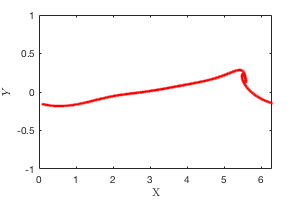

In [7]:
%%
clf
set(gca,'fontsize',28)
for i=1:1:length(t)
plot(x_o(:,i),y_o(:,i),'.r')
xlim([0 2*pi])
ylim([-1 1]) 
pause(0.1)
hold off
end
% set(gca,'fontsize',28)
xlabel('X','interpreter','latex')
ylabel('$Y$','interpreter','latex')
set(gcf, 'Position',  [100, 100, 300, 200])
set(gcf,'color','w');

It looks like it'll be tough to watch this as a movie, so we'll have to think about how we display the data

In [8]:
%% compute velocity 
u = zeros(N,length(t));
v = zeros(N,length(t));
for i = 1:N
   u(i,:) = gradient(x_o(i,:))./gradient(t');
   v(i,:) = gradient(y_o(i,:))./gradient(t');
end 
% compute accelerations 
ax = u; ay = u;
for i=1:N
    ax(i,:)=gradient(u(i,:))./gradient(t');
    ay(i,:)=gradient(v(i,:))./gradient(t');
end

In [199]:
%% find phase speed of max, max slope, max curvature
m = zeros(length(t),1);
ind = m;
xm = m; mx = m; indx = m;
xsm = xm; um = m; usm = m;
for i=1:length(t)
    
    [m(i),ind(i)]=max(y_o(:,i));
    
    xm(i,1)=x_o(ind(i),i);
    
    um(i,1)=u(ind(i),i);
    
    [mx(i), indx(i)] = min((gradient(y_o(:,i))./...
    gradient(x_o(:,i))));

    xsm(i,1)=x_o(indx(i),i);
    
    usm(i,1)=u(indx(i),i);
end

Array indices must be positive integers or logical values.


We should corroborate this visually. 

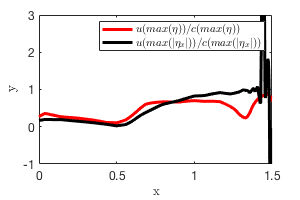

In [10]:
%% look at the ratios of u/c
cm=gradient(smooth(unwrap(xm),5))./gradient(t);
cmx=gradient(smooth(unwrap(xsm),5))./gradient(t);
clf
p1=plot(t,smooth(um./cm,5),'r','linewidth',3);
hold on
p2=plot(t,smooth(usm./cmx,5),'k','linewidth',3);
ylim([-1 3])
xlim([0 1.5])
set(gca,'fontsize',12)
xlabel('x','interpreter','latex')
ylabel('y','interpreter','latex')
set(gcf, 'Position',  [100, 100, 300, 200])
set(gcf,'color','w');
l1=legend([p1 p2],'$u(max(\eta))/c(max(\eta))$',...
    '$u(max(|\eta_x|))/c(max(|\eta_x|))$');
set(l1,'interpreter','latex')

Wave packets
-----------------
We now move from studying individual waves, to wave packets. 

Definitions: 

Wave packet slope

Wave packet bandwidth

Focusing location

Central wavenumber/frequency

11/10
Small, medium, and large breaking wave study
---

Goals: Find breaking criteria of waves.
Find kinematic criteria and spatial dependence for periodic, deep-water, irrotational waves. Dominant wave is 2$\pi$ periodic.
Using Dold to solve the full equations of motion with N=512.
* need to reduce noise
* looking at waves with amplitude 0.01, 0.1, and 0.5

Case 1: amplitude=0.01
---

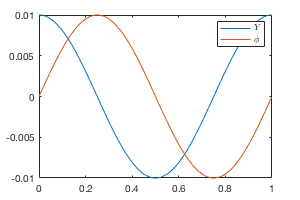

In [28]:
%% Begin Matlab code 
cd /Users/airsealab/Documents/github/ParticleKinematics//
%
N = 512; % number of spectral modes
ML = 2*pi;
wl = 2*pi;
g = 1; 
xi = 0:1/N:1-1/N; 
x = xi;
% a=0.275;
a = 0.01;
y = a*cos(2*pi*xi);
f = a*sin(2*pi*xi);
xi2 = 0:max(xi)/(N-1):max(xi);
xx = interp1(xi,x,xi2)';
% look at initial conditions
clf
yy = interp1(x,y,xx);
ff = interp1(x,f,xx);
clf
p1 = plot(xx,yy);
hold on
p2 = plot(xx,ff);
x3 = xx*2*pi;
l1 = legend([p1 p2],'$Y$','$\phi$');
set(l1,'interpreter','latex')
set(gcf, 'Position',  [100, 100, 300, 200])
set(gcf,'color','w');

In [29]:
%%
tl=15;
delete xc.txt
delete yc.txt 
delete fc.txt 
delete bw.txt
delete wl.txt
delete S.txt
% delete k.txt
BW=1;
% save xc.txt x_f -ascii
% save yc.txt y_f -ascii
% save fc.txt f_f -ascii
save xc.txt x3 -ascii
save yc.txt yy -ascii
save fc.txt ff -ascii
save S.txt a -ascii
save bw.txt BW -ascii
save tl.txt tl -ascii
save wl.txt wl -ascii 
% save k.txt k -ascii
unix('./run2.sh'); 

dold.f:291:21:

       common /profil/ x(-6:N7),y(-6:N7),f(-6:N7),
                     1
STOP <information for resumption is stored in ww.res>


In [30]:
%%
formatSpec='%f'; 
fileID = fopen(['x.txt'], 'r');
xout = fscanf(fileID,formatSpec);
fclose(fileID); 
fileID = fopen(['y.txt'], 'r');
yout = fscanf( fileID, formatSpec);
fclose( fileID );
fileID = fopen(['phi.txt'], 'r');
pout = fscanf(fileID,formatSpec);
fclose(fileID);
fileID = fopen(['t.txt'], 'r');
to = fscanf(fileID,formatSpec);
fclose(fileID);
t = to(1:N:end);
nout_0 = length(t);
nout = round(nout_0)-1;
data_o = zeros(N,nout_0);
x_o = zeros(N,nout_0);
y_o = zeros(N,nout_0);
p_o = zeros(N,nout_0);
for i = 1:N
for j = 1:nout_0
x_o(i,j) = xout(i+N*(j-1),1);
y_o(i,j) = yout(i+N*(j-1),1);
p_o(i,j) = pout(i+N*(j-1),1);
end
end
xi = 0:2*pi/N:2*pi*(1-1/N);
dxi = abs(xi(2)-xi(1));
% reinterpolate
M = 1*N;
xi2 = 0:2*pi/M:2*pi*(1-1/M);
x_1 = zeros(M,length(t));
y_1 = x_1;
for i = 1:length(t)
    x_1(:,i) = interp1(xi,x_o(:,i),xi2);
    y_1(:,i) =  interp1(xi,y_o(:,i),xi2);
end
t2 = 0: max(t)/1000 :max(t);
x_2 = zeros(M,length(t2));
y_2 = x_2;
for i = 1:M
    x_2(i,:) = interp1(t,x_1(i,:),t2);
    y_2(i,:) = interp1(t,y_1(i,:),t2);
end

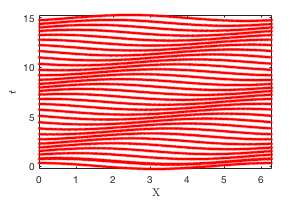

In [37]:
%%
clf
set(gca,'fontsize',28)
for i=1:1:length(t)
plot((x_o(:,i)),t(i)+30*y_o(:,i),'.r')
hold on
xlim([0 2*pi])
end
% set(gca,'fontsize',28)
xlabel('X','interpreter','latex')
ylabel('$t$','interpreter','latex')
set(gcf, 'Position',  [100, 100, 300, 200])
set(gcf,'color','w');

In [38]:
%% compute velocity 
u = zeros(N,length(t));
v = zeros(N,length(t));
for i = 1:N
   u(i,:) = gradient(x_o(i,:))./gradient(t');
   v(i,:) = gradient(y_o(i,:))./gradient(t');
end 
% compute accelerations 
ax = u; ay = u;
for i=1:N
    ax(i,:)=gradient(u(i,:))./gradient(t');
    ay(i,:)=gradient(v(i,:))./gradient(t');
end

In [39]:
%% find phase speed of max, max slope, max curvature
m = zeros(length(t),1);
ind = m;
xm = m; mx = m; indx = m;
xsm = xm; um = m; usm = m;
for i=1:length(t)
    
    [m(i),ind(i)]=max(y_o(:,i));
    
    xm(i,1)=x_o(ind(i),i);
    
    um(i,1)=u(ind(i),i);
    
    [mx(i), indx(i)] = min((gradient(y_o(:,i))./...
    gradient(x_o(:,i))));

    xsm(i,1)=x_o(indx(i),i);
    
    usm(i,1)=u(indx(i),i);
end

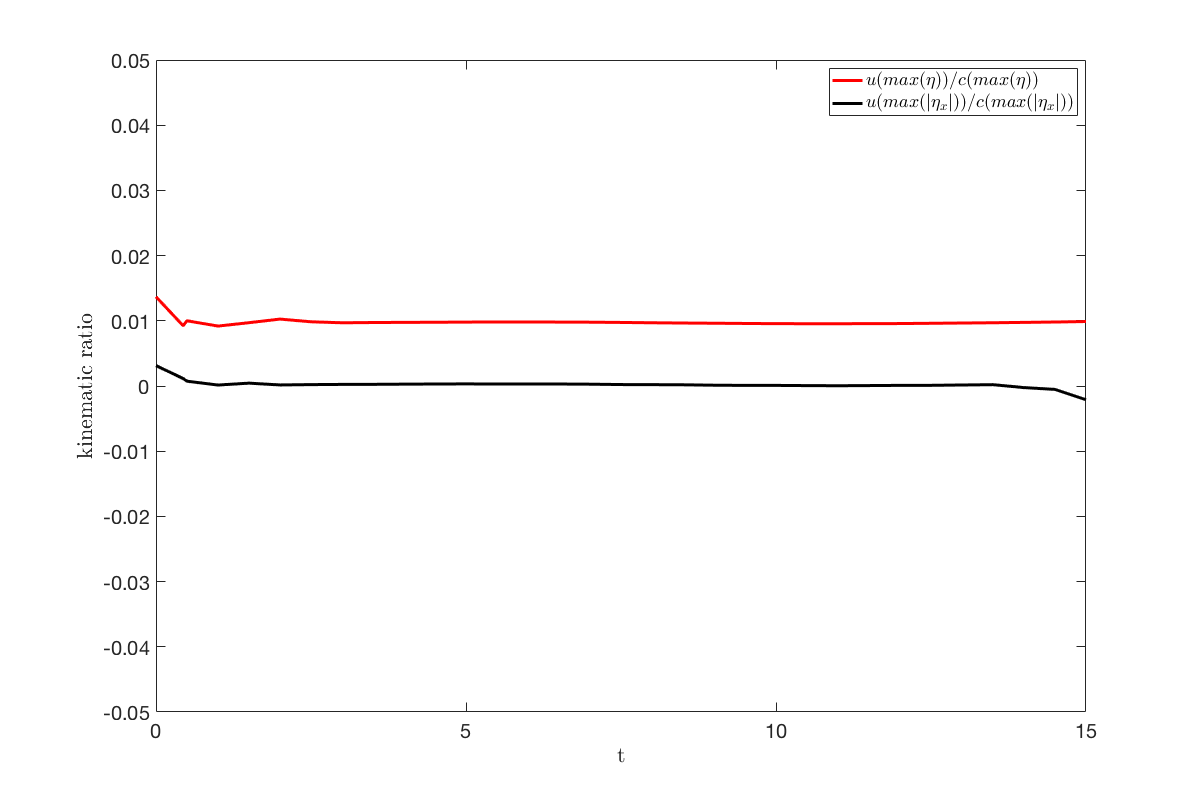

In [47]:
%% look at the ratios of u/c
cm=gradient(smooth(unwrap(xm),5))./gradient(t);
cmx=gradient(smooth(unwrap(xsm),5))./gradient(t);
clf
p1=plot(t,smooth(um./cm,5),'r','linewidth',3);
hold on
p2=plot(t,smooth(usm./cmx,5),'k','linewidth',3);
ylim([-0.05 0.05])
xlim([0 max(t)])
set(gca,'fontsize',20)
xlabel('t','interpreter','latex')
ylabel('kinematic ratio','interpreter','latex')
set(gcf, 'Position',  [100, 100, 1200, 800])
set(gcf,'color','w');
l1=legend([p1 p2],'$u(max(\eta))/c(max(\eta))$',...
    '$u(max(|\eta_x|))/c(max(|\eta_x|))$');
set(l1,'interpreter','latex')

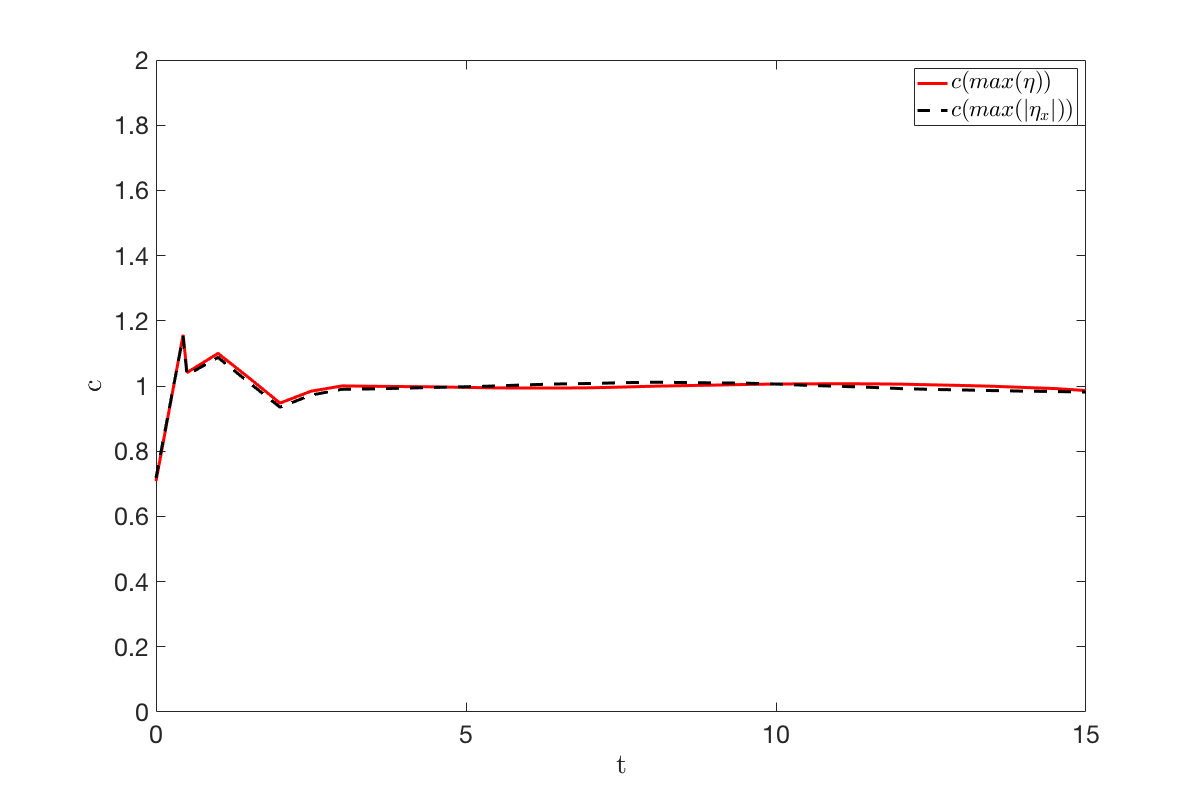

In [53]:
%% look at c
cm=gradient(smooth(unwrap(xm),5))./gradient(t);
cmx=gradient(smooth(unwrap(xsm),5))./gradient(t);
clf
p1=plot(t,smooth(cm,5),'r','linewidth',3);
hold on
p2=plot(t,smooth(cmx,5),'--k','linewidth',3);
ylim([0 2])
xlim([0 max(t)])
set(gca,'fontsize',25)
xlabel('t','interpreter','latex')
ylabel('c','interpreter','latex')
set(gcf, 'Position',  [100, 100, 1200, 800])
set(gcf,'color','w');
l1=legend([p1 p2],'$c(max(\eta))$',...
    '$c(max(|\eta_x|))$');
set(l1,'interpreter','latex')

Phase speed is constant in monochromatic waves, so it's the same at peak and at steepest point

Case 2: Amplitude=0.1
---

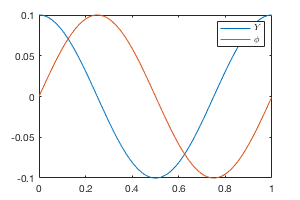

In [69]:
%% Begin Matlab code 
cd /Users/airsealab/Documents/github/ParticleKinematics//
%
N = 512; % number of spectral modes
ML = 2*pi;
wl = 2*pi;
g = 1; 
xi = 0:1/N:1-1/N; 
x = xi;
% a=0.275;
a = 0.1;
y = a*cos(2*pi*xi);
f = a*sin(2*pi*xi);
xi2 = 0:max(xi)/(N-1):max(xi);
xx = interp1(xi,x,xi2)';
% look at initial conditions
clf
yy = interp1(x,y,xx);
ff = interp1(x,f,xx);
clf
p1 = plot(xx,yy);
hold on
p2 = plot(xx,ff);
x3 = xx*2*pi;
l1 = legend([p1 p2],'$Y$','$\phi$');
set(l1,'interpreter','latex')
set(gcf, 'Position',  [100, 100, 300, 200])
set(gcf,'color','w');

In [70]:
%%
tl=15;
delete xc.txt
delete yc.txt 
delete fc.txt 
delete bw.txt
delete wl.txt
delete S.txt
% delete k.txt
BW=1;
% save xc.txt x_f -ascii
% save yc.txt y_f -ascii
% save fc.txt f_f -ascii
save xc.txt x3 -ascii
save yc.txt yy -ascii
save fc.txt ff -ascii
save S.txt a -ascii
save bw.txt BW -ascii
save tl.txt tl -ascii
save wl.txt wl -ascii 
% save k.txt k -ascii
unix('./run2.sh'); 

dold.f:291:21:

       common /profil/ x(-6:N7),y(-6:N7),f(-6:N7),
                     1
STOP <information for resumption is stored in ww.res>


In [71]:
%%
formatSpec='%f'; 
fileID = fopen(['x.txt'], 'r');
xout = fscanf(fileID,formatSpec);
fclose(fileID); 
fileID = fopen(['y.txt'], 'r');
yout = fscanf( fileID, formatSpec);
fclose( fileID );
fileID = fopen(['phi.txt'], 'r');
pout = fscanf(fileID,formatSpec);
fclose(fileID);
fileID = fopen(['t.txt'], 'r');
to = fscanf(fileID,formatSpec);
fclose(fileID);
t = to(1:N:end);
nout_0 = length(t);
nout = round(nout_0)-1;
data_o = zeros(N,nout_0);
x_o = zeros(N,nout_0);
y_o = zeros(N,nout_0);
p_o = zeros(N,nout_0);
for i = 1:N
for j = 1:nout_0
x_o(i,j) = xout(i+N*(j-1),1);
y_o(i,j) = yout(i+N*(j-1),1);
p_o(i,j) = pout(i+N*(j-1),1);
end
end
xi = 0:2*pi/N:2*pi*(1-1/N);
dxi = abs(xi(2)-xi(1));
% reinterpolate
M = 1*N;
xi2 = 0:2*pi/M:2*pi*(1-1/M);
x_1 = zeros(M,length(t));
y_1 = x_1;
for i = 1:length(t)
    x_1(:,i) = interp1(xi,x_o(:,i),xi2);
    y_1(:,i) =  interp1(xi,y_o(:,i),xi2);
end
t2 = 0: max(t)/1000 :max(t);
x_2 = zeros(M,length(t2));
y_2 = x_2;
for i = 1:M
    x_2(i,:) = interp1(t,x_1(i,:),t2);
    y_2(i,:) = interp1(t,y_1(i,:),t2);
end

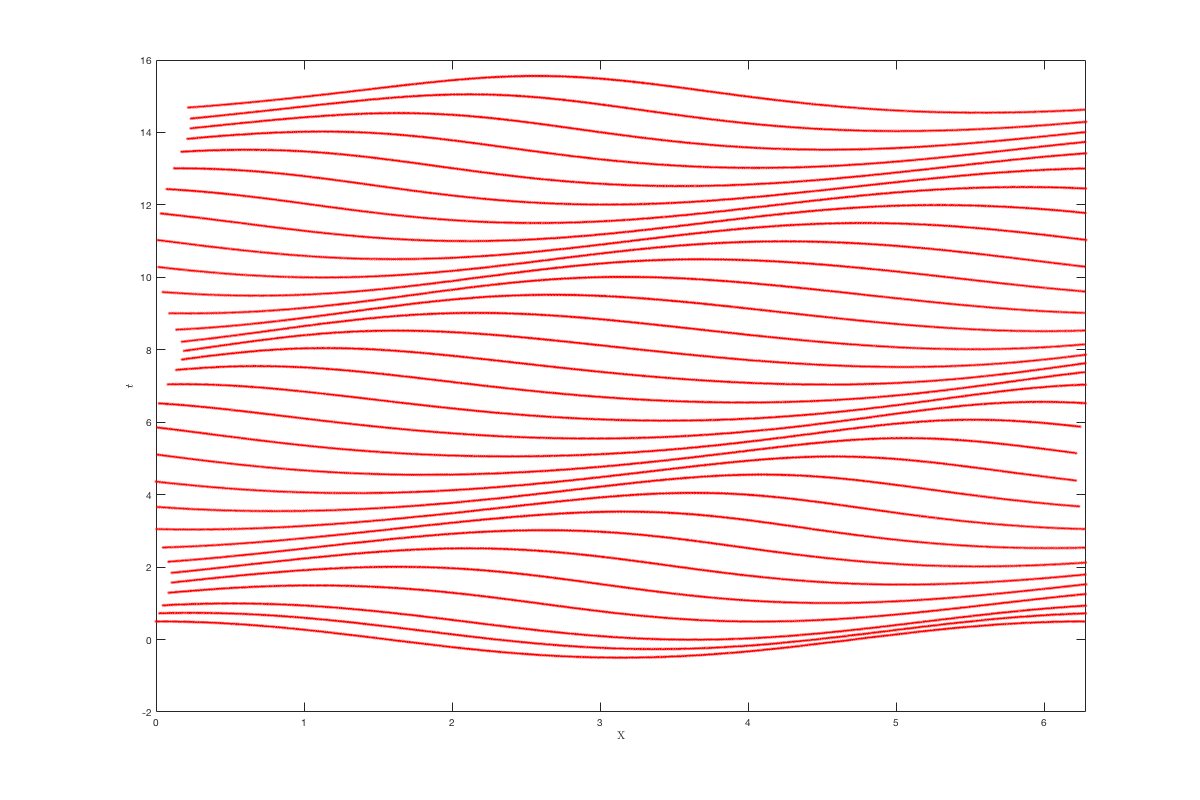

In [74]:
%%
clf
set(gca,'fontsize',28)
for i=1:1:length(t)
plot((x_o(:,i)),t(i)+5*y_o(:,i),'.r')
hold on
xlim([0 2*pi])
end
% set(gca,'fontsize',28)
xlabel('X','interpreter','latex')
ylabel('$t$','interpreter','latex')
set(gcf, 'Position',  [100, 100, 1200, 800])
set(gcf,'color','w');

In [75]:
%% compute velocity 
u = zeros(N,length(t));
v = zeros(N,length(t));
for i = 1:N
   u(i,:) = gradient(x_o(i,:))./gradient(t');
   v(i,:) = gradient(y_o(i,:))./gradient(t');
end 
% compute accelerations 
ax = u; ay = u;
for i=1:N
    ax(i,:)=gradient(u(i,:))./gradient(t');
    ay(i,:)=gradient(v(i,:))./gradient(t');
end

In [76]:
%% find phase speed of max, max slope, max curvature
m = zeros(length(t),1);
ind = m;
xm = m; mx = m; indx = m;
xsm = xm; um = m; usm = m;
for i=1:length(t)
    
    [m(i),ind(i)]=max(y_o(:,i));
    
    xm(i,1)=x_o(ind(i),i);
    
    um(i,1)=u(ind(i),i);
    
    [mx(i), indx(i)] = min((gradient(y_o(:,i))./...
    gradient(x_o(:,i))));

    xsm(i,1)=x_o(indx(i),i);
    
    usm(i,1)=u(indx(i),i);
end

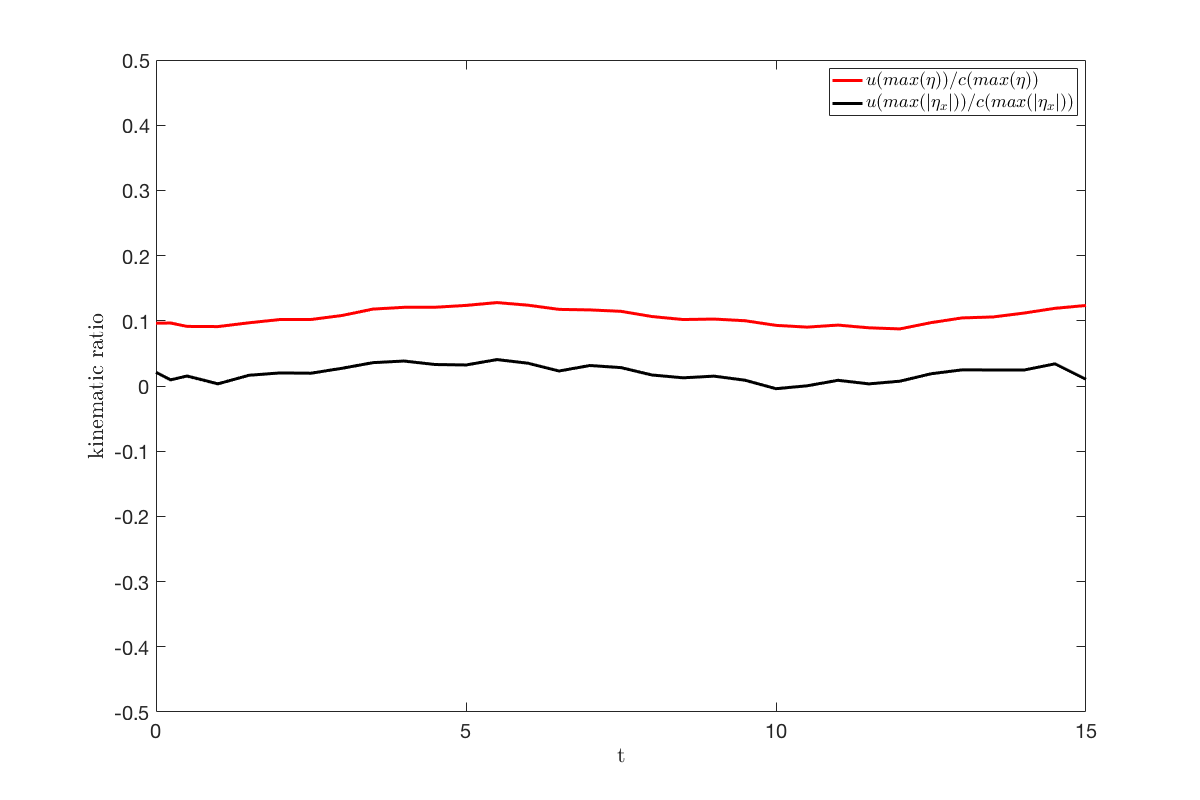

In [78]:
%% look at the ratios of u/c
cm=gradient(unwrap(xm))./gradient(t);
cmx=gradient(unwrap(xsm))./gradient(t);
clf
p1=plot(t,um./cm,'r','linewidth',3);
hold on
p2=plot(t,usm./cmx,'k','linewidth',3);
ylim([-0.5 0.5])
xlim([0 max(t)])
set(gca,'fontsize',20)
xlabel('t','interpreter','latex')
ylabel('kinematic ratio','interpreter','latex')
set(gcf, 'Position',  [100, 100, 1200, 800])
set(gcf,'color','w');
l1=legend([p1 p2],'$u(max(\eta))/c(max(\eta))$',...
    '$u(max(|\eta_x|))/c(max(|\eta_x|))$');
set(l1,'interpreter','latex')

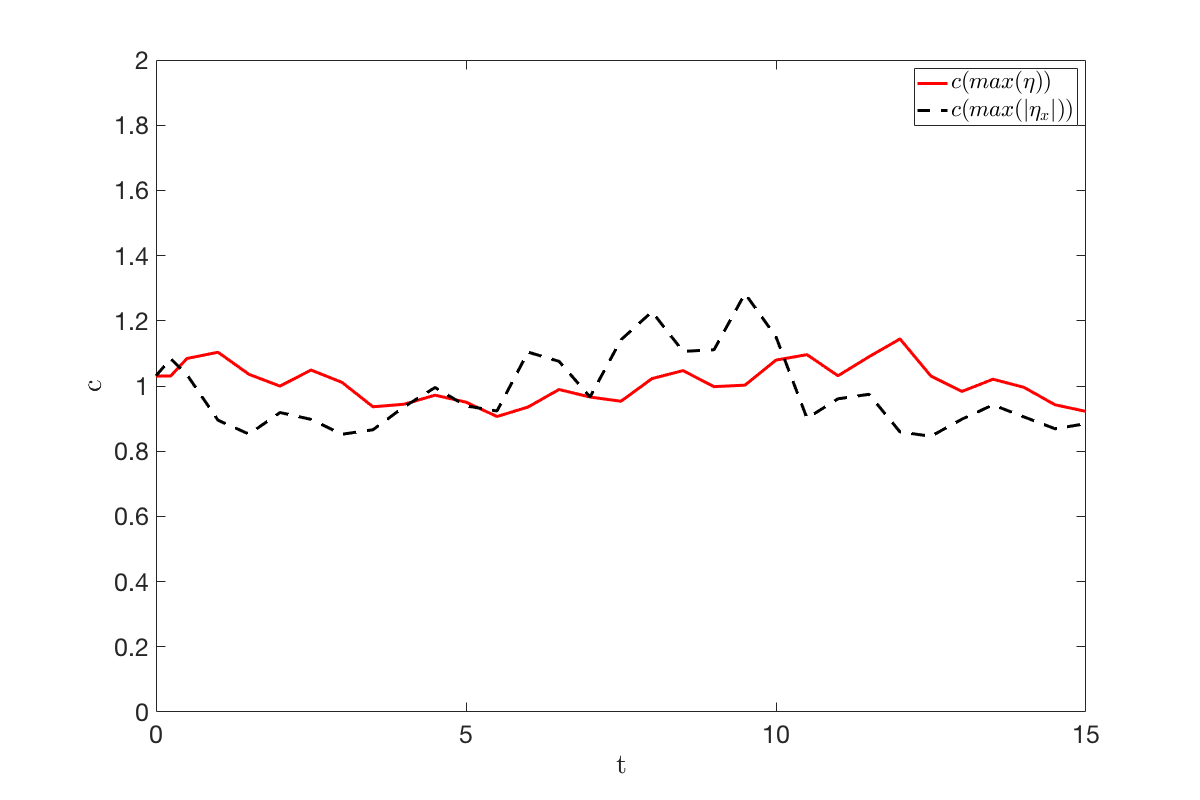

In [80]:
%% look at c
cm=gradient(unwrap(xm))./gradient(t);
cmx=gradient(unwrap(xsm))./gradient(t);
clf
p1=plot(t,cm,'r','linewidth',3);
hold on
p2=plot(t,cmx,'--k','linewidth',3);
ylim([0 2])
xlim([0 max(t)])
set(gca,'fontsize',25)
xlabel('t','interpreter','latex')
ylabel('c','interpreter','latex')
set(gcf, 'Position',  [100, 100, 1200, 800])
set(gcf,'color','w');
l1=legend([p1 p2],'$c(max(\eta))$',...
    '$c(max(|\eta_x|))$');
set(l1,'interpreter','latex')

There's more oscillation than the first case. The 2 phase velocities are still close. The two phase velocities are out of phase by the end.

Case 3: a=0.5
---

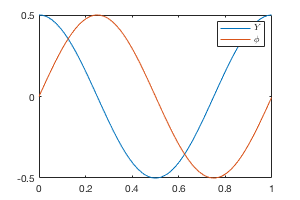

In [81]:
%% Begin Matlab code 
cd /Users/airsealab/Documents/github/ParticleKinematics//
%
N = 512; % number of spectral modes
ML = 2*pi;
wl = 2*pi;
g = 1; 
xi = 0:1/N:1-1/N; 
x = xi;
% a=0.275;
a = 0.5;
y = a*cos(2*pi*xi);
f = a*sin(2*pi*xi);
xi2 = 0:max(xi)/(N-1):max(xi);
xx = interp1(xi,x,xi2)';
% look at initial conditions
clf
yy = interp1(x,y,xx);
ff = interp1(x,f,xx);
clf
p1 = plot(xx,yy);
hold on
p2 = plot(xx,ff);
x3 = xx*2*pi;
l1 = legend([p1 p2],'$Y$','$\phi$');
set(l1,'interpreter','latex')
set(gcf, 'Position',  [100, 100, 300, 200])
set(gcf,'color','w');

In [82]:
%%
tl=15;
delete xc.txt
delete yc.txt 
delete fc.txt 
delete bw.txt
delete wl.txt
delete S.txt
% delete k.txt
BW=1;
% save xc.txt x_f -ascii
% save yc.txt y_f -ascii
% save fc.txt f_f -ascii
save xc.txt x3 -ascii
save yc.txt yy -ascii
save fc.txt ff -ascii
save S.txt a -ascii
save bw.txt BW -ascii
save tl.txt tl -ascii
save wl.txt wl -ascii 
% save k.txt k -ascii
unix('./run2.sh'); 

dold.f:291:21:

       common /profil/ x(-6:N7),y(-6:N7),f(-6:N7),
                     1
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO
STOP data is no longer intelligible


In [83]:
%%
formatSpec='%f'; 
fileID = fopen(['x.txt'], 'r');
xout = fscanf(fileID,formatSpec);
fclose(fileID); 
fileID = fopen(['y.txt'], 'r');
yout = fscanf( fileID, formatSpec);
fclose( fileID );
fileID = fopen(['phi.txt'], 'r');
pout = fscanf(fileID,formatSpec);
fclose(fileID);
fileID = fopen(['t.txt'], 'r');
to = fscanf(fileID,formatSpec);
fclose(fileID);
t = to(1:N:end);
nout_0 = length(t);
nout = round(nout_0)-1;
data_o = zeros(N,nout_0);
x_o = zeros(N,nout_0);
y_o = zeros(N,nout_0);
p_o = zeros(N,nout_0);
for i = 1:N
for j = 1:nout_0
x_o(i,j) = xout(i+N*(j-1),1);
y_o(i,j) = yout(i+N*(j-1),1);
p_o(i,j) = pout(i+N*(j-1),1);
end
end
xi = 0:2*pi/N:2*pi*(1-1/N);
dxi = abs(xi(2)-xi(1));
% reinterpolate
M = 1*N;
xi2 = 0:2*pi/M:2*pi*(1-1/M);
x_1 = zeros(M,length(t));
y_1 = x_1;
for i = 1:length(t)
    x_1(:,i) = interp1(xi,x_o(:,i),xi2);
    y_1(:,i) =  interp1(xi,y_o(:,i),xi2);
end
t2 = 0: max(t)/1000 :max(t);
x_2 = zeros(M,length(t2));
y_2 = x_2;
for i = 1:M
    x_2(i,:) = interp1(t,x_1(i,:),t2);
    y_2(i,:) = interp1(t,y_1(i,:),t2);
end

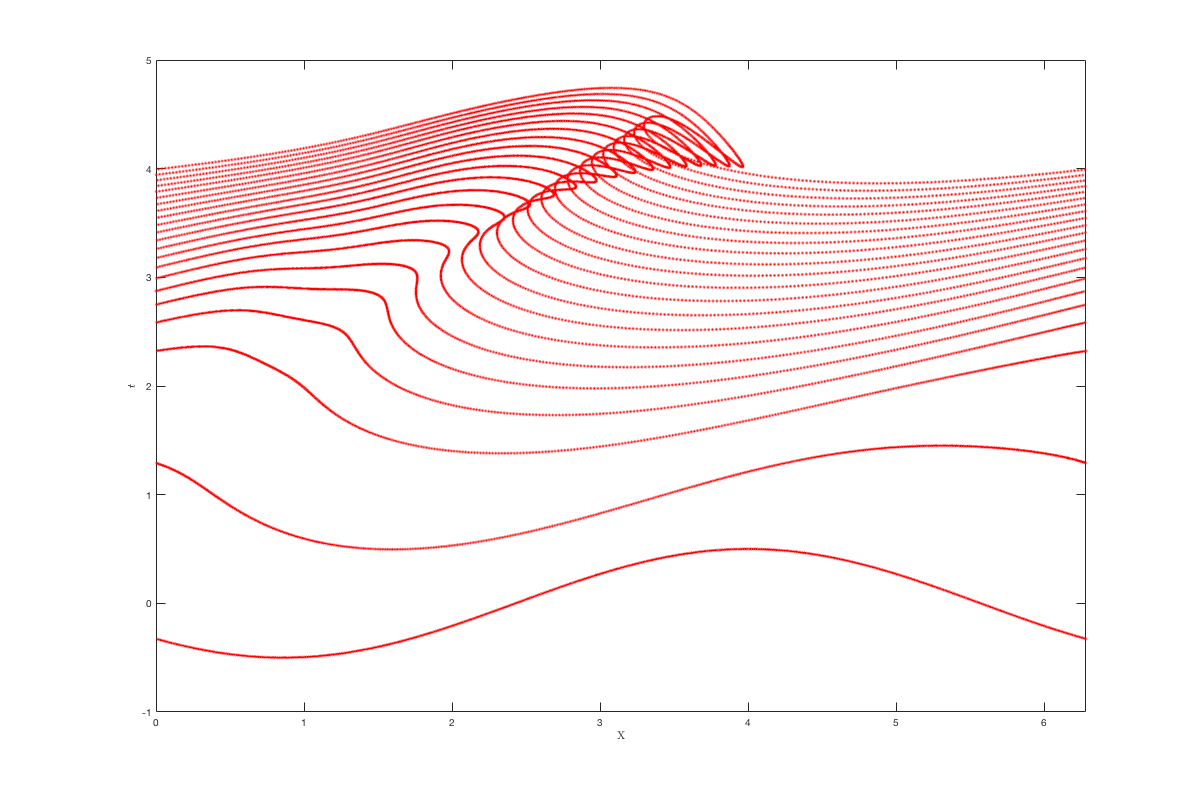

In [92]:
%%
clf
set(gca,'fontsize',28)
for i=1:5:length(t)
plot(mod(4+x_o(:,i),2*pi),t(i)+y_o(:,i),'.r')
hold on
xlim([0 2*pi])
end
% set(gca,'fontsize',28)
xlabel('X','interpreter','latex')
ylabel('$t$','interpreter','latex')
set(gcf, 'Position',  [100, 100, 1200, 800])
set(gcf,'color','w');

In [93]:
%% compute velocity 
u = zeros(N,length(t));
v = zeros(N,length(t));
for i = 1:N
   u(i,:) = gradient(x_o(i,:))./gradient(t');
   v(i,:) = gradient(y_o(i,:))./gradient(t');
end 
% compute accelerations 
ax = u; ay = u;
for i=1:N
    ax(i,:)=gradient(u(i,:))./gradient(t');
    ay(i,:)=gradient(v(i,:))./gradient(t');
end

In [94]:
%% find phase speed of max, max slope, max curvature
m = zeros(length(t),1);
ind = m;
xm = m; mx = m; indx = m;
xsm = xm; um = m; usm = m;
for i=1:length(t)
    
    [m(i),ind(i)]=max(y_o(:,i));
    
    xm(i,1)=x_o(ind(i),i);
    
    um(i,1)=u(ind(i),i);
    
    [mx(i), indx(i)] = min((gradient(y_o(:,i))./...
    gradient(x_o(:,i))));

    xsm(i,1)=x_o(indx(i),i);
    
    usm(i,1)=u(indx(i),i);
end

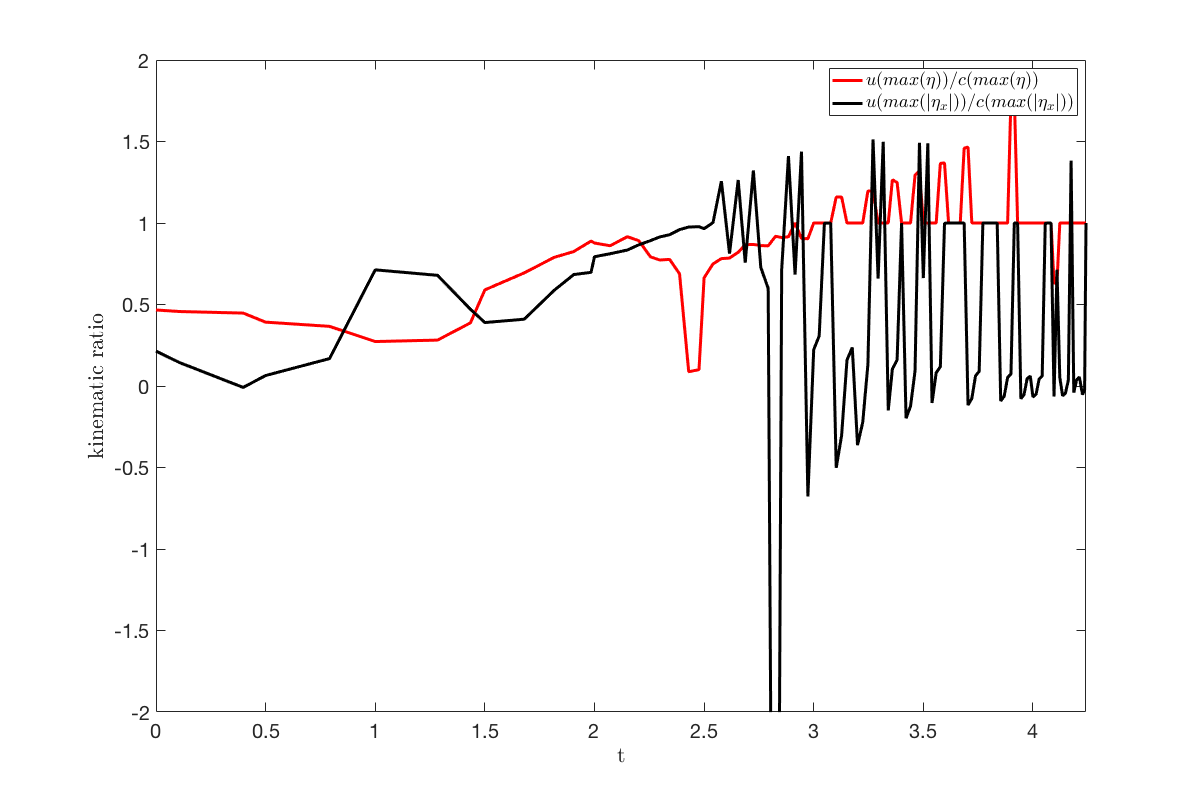

In [98]:
%% look at the ratios of u/c
cm=gradient(unwrap(xm))./gradient(t);
cmx=gradient(unwrap(xsm))./gradient(t);
clf
p1=plot(t,um./cm,'r','linewidth',3);
hold on
p2=plot(t,usm./cmx,'k','linewidth',3);
ylim([-2 2])
xlim([0 max(t)])
set(gca,'fontsize',20)
xlabel('t','interpreter','latex')
ylabel('kinematic ratio','interpreter','latex')
set(gcf, 'Position',  [100, 100, 1200, 800])
set(gcf,'color','w');
l1=legend([p1 p2],'$u(max(\eta))/c(max(\eta))$',...
    '$u(max(|\eta_x|))/c(max(|\eta_x|))$');
set(l1,'interpreter','latex')

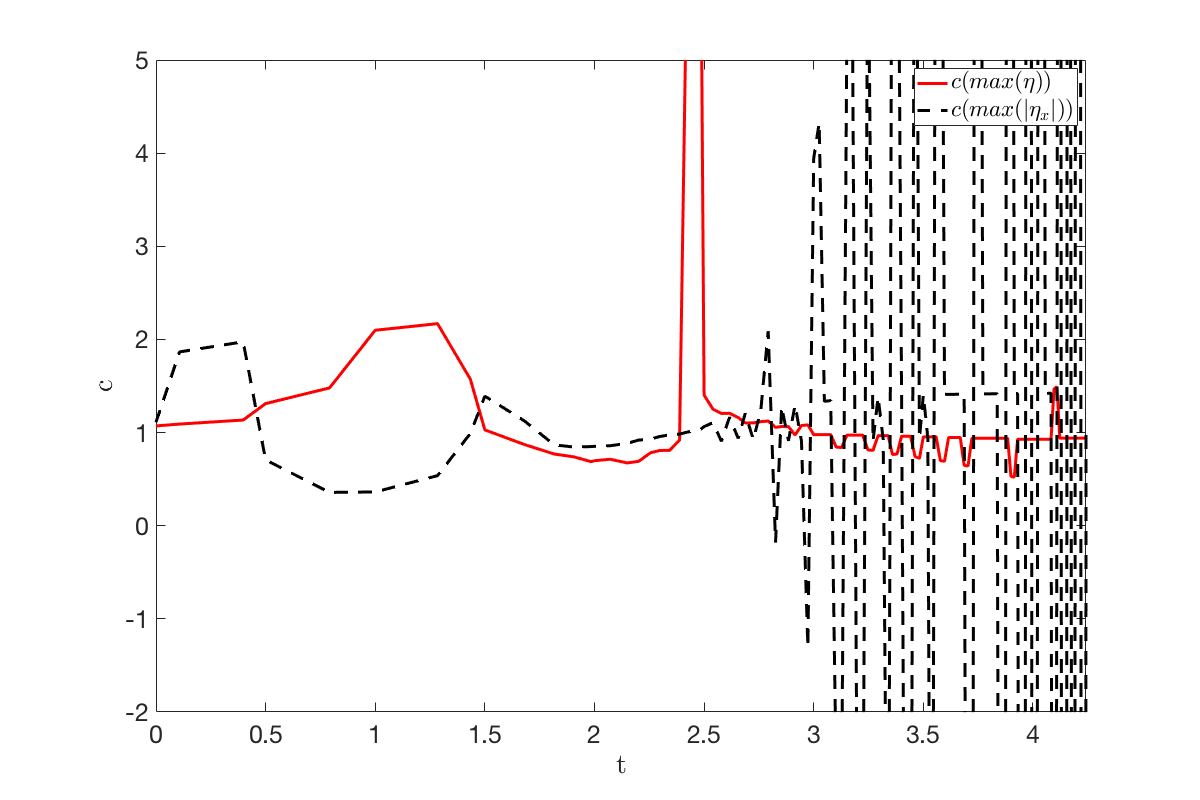

In [101]:
%% look at c
cm=gradient(unwrap(xm))./gradient(t);
cmx=gradient(unwrap(xsm))./gradient(t);
clf
p1=plot(t,cm,'r','linewidth',3);
hold on
p2=plot(t,cmx,'--k','linewidth',3);
ylim([-2 5])
xlim([0 max(t)])
set(gca,'fontsize',25)
xlabel('t','interpreter','latex')
ylabel('c','interpreter','latex')
set(gcf, 'Position',  [100, 100, 1200, 800])
set(gcf,'color','w');
l1=legend([p1 p2],'$c(max(\eta))$',...
    '$c(max(|\eta_x|))$');
set(l1,'interpreter','latex')

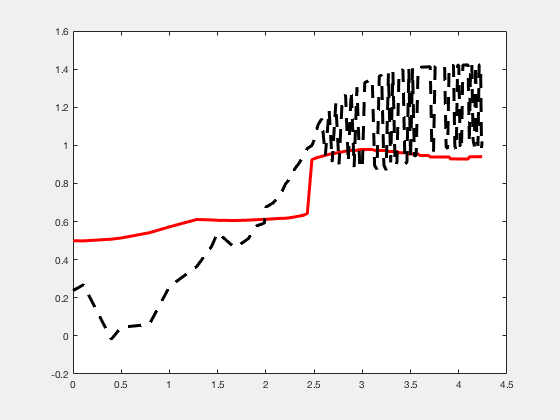

In [102]:
p1=plot(t,um,'r','linewidth',3);
hold on
p2=plot(t,usm,'--k','linewidth',3);

The two phase velocities are completely different. While before the kinematic constant at the peak was larger than the one at the steepest point, now  

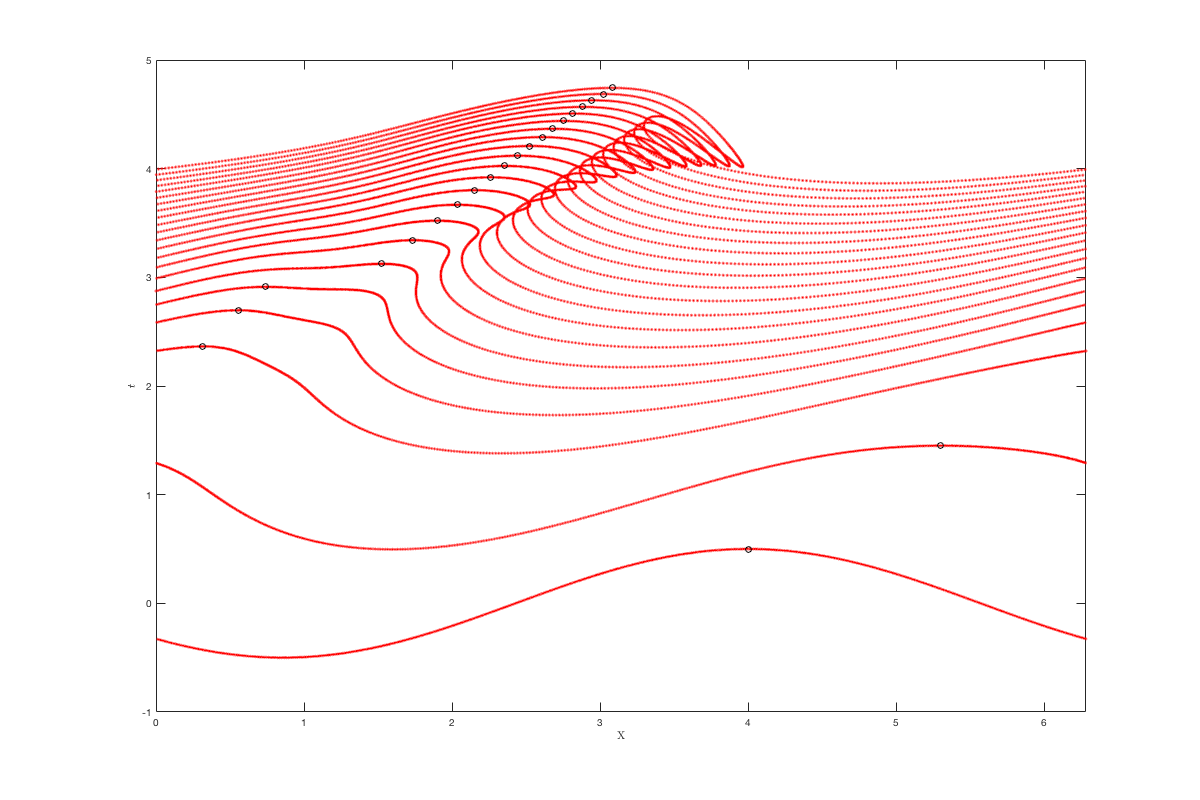

In [105]:
%%
clf
set(gca,'fontsize',28)
for i=1:5:length(t)
plot(mod(4+x_o(:,i),2*pi),t(i)+y_o(:,i),'.r')
hold on
plot(mod(4+x_o(ind(i),i),2*pi),t(i)+y_o(ind(i),i),'ok')
hold on
xlim([0 2*pi])
end
% set(gca,'fontsize',28)
xlabel('X','interpreter','latex')
ylabel('$t$','interpreter','latex')
set(gcf, 'Position',  [100, 100, 1200, 800])
set(gcf,'color','w');

The highest point jumps.

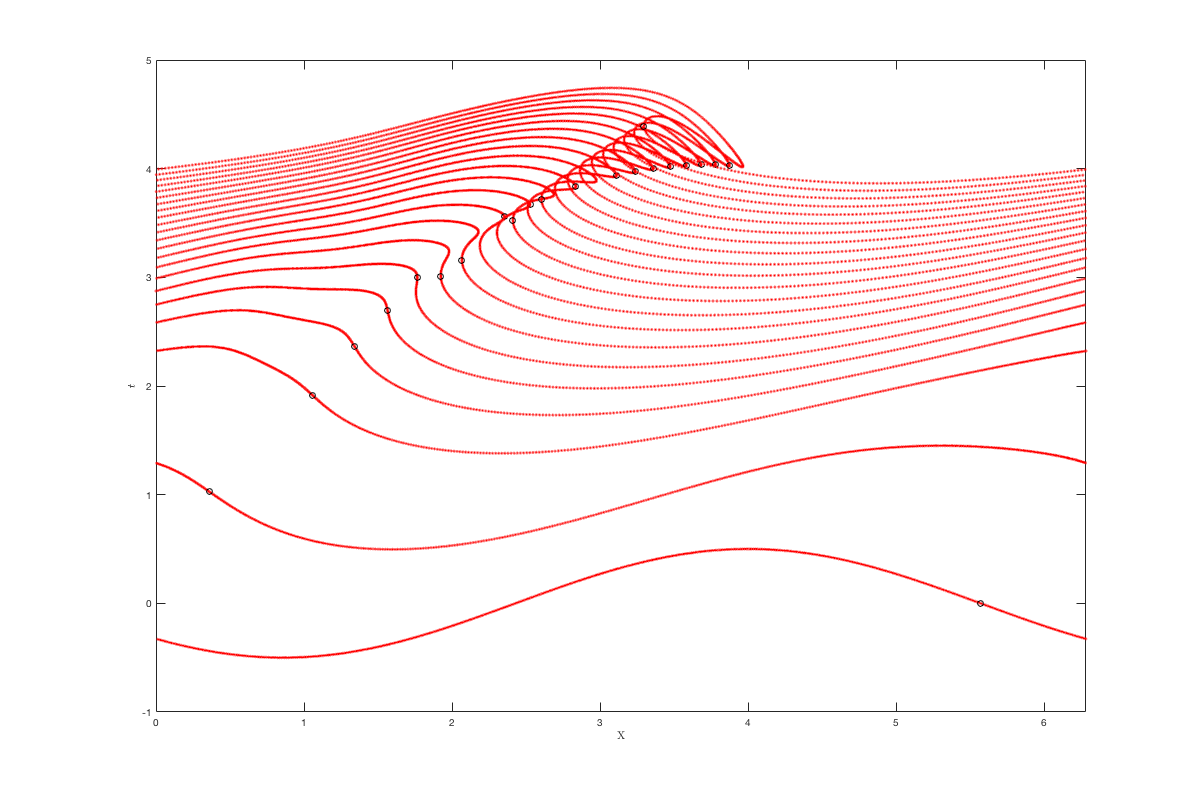

In [106]:
%%
clf
set(gca,'fontsize',28)
for i=1:5:length(t)
plot(mod(4+x_o(:,i),2*pi),t(i)+y_o(:,i),'.r')
hold on
plot(mod(4+x_o(indx(i),i),2*pi),t(i)+y_o(indx(i),i),'ok')
hold on
xlim([0 2*pi])
end
% set(gca,'fontsize',28)
xlabel('X','interpreter','latex')
ylabel('$t$','interpreter','latex')
set(gcf, 'Position',  [100, 100, 1200, 800])
set(gcf,'color','w');

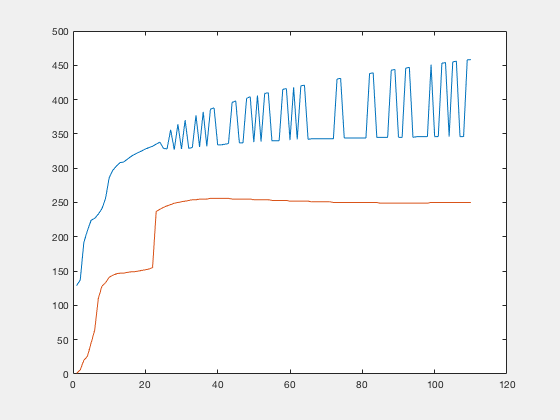

In [107]:
plot(indx)
hold on
plot(ind)

a=0.2
---

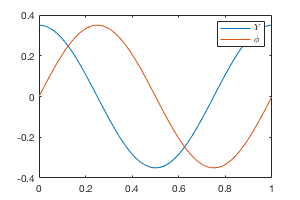

In [121]:
%% Begin Matlab code 
cd /Users/airsealab/Documents/github/ParticleKinematics//
%
N = 512; % number of spectral modes
ML = 2*pi;
wl = 2*pi;
g = 1; 
xi = 0:1/N:1-1/N; 
x = xi;
% a=0.275;
a = 0.35;
y = a*cos(2*pi*xi);
f = a*sin(2*pi*xi);
xi2 = 0:max(xi)/(N-1):max(xi);
xx = interp1(xi,x,xi2)';
% look at initial conditions
clf
yy = interp1(x,y,xx);
ff = interp1(x,f,xx);
clf
p1 = plot(xx,yy);
hold on
p2 = plot(xx,ff);
x3 = xx*2*pi;
l1 = legend([p1 p2],'$Y$','$\phi$');
set(l1,'interpreter','latex')
set(gcf, 'Position',  [100, 100, 300, 200])
set(gcf,'color','w');

In [122]:
%%
tl=75;
delete xc.txt
delete yc.txt 
delete fc.txt 
delete bw.txt
delete wl.txt
delete S.txt
% delete k.txt
BW=1;
% save xc.txt x_f -ascii
% save yc.txt y_f -ascii
% save fc.txt f_f -ascii
save xc.txt x3 -ascii
save yc.txt yy -ascii
save fc.txt ff -ascii
save S.txt a -ascii
save bw.txt BW -ascii
save tl.txt tl -ascii
save wl.txt wl -ascii 
% save k.txt k -ascii
unix('./run2.sh'); 

dold.f:291:21:

       common /profil/ x(-6:N7),y(-6:N7),f(-6:N7),
                     1
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO
STOP data is no longer intelligible


In [123]:
%%
formatSpec='%f'; 
fileID = fopen(['x.txt'], 'r');
xout = fscanf(fileID,formatSpec);
fclose(fileID); 
fileID = fopen(['y.txt'], 'r');
yout = fscanf( fileID, formatSpec);
fclose( fileID );
fileID = fopen(['phi.txt'], 'r');
pout = fscanf(fileID,formatSpec);
fclose(fileID);
fileID = fopen(['t.txt'], 'r');
to = fscanf(fileID,formatSpec);
fclose(fileID);
t = to(1:N:end);
nout_0 = length(t);
nout = round(nout_0)-1;
data_o = zeros(N,nout_0);
x_o = zeros(N,nout_0);
y_o = zeros(N,nout_0);
p_o = zeros(N,nout_0);
for i = 1:N
for j = 1:nout_0
x_o(i,j) = xout(i+N*(j-1),1);
y_o(i,j) = yout(i+N*(j-1),1);
p_o(i,j) = pout(i+N*(j-1),1);
end
end
xi = 0:2*pi/N:2*pi*(1-1/N);
dxi = abs(xi(2)-xi(1));
% reinterpolate
M = 1*N;
xi2 = 0:2*pi/M:2*pi*(1-1/M);
x_1 = zeros(M,length(t));
y_1 = x_1;
for i = 1:length(t)
    x_1(:,i) = interp1(xi,x_o(:,i),xi2);
    y_1(:,i) =  interp1(xi,y_o(:,i),xi2);
end
t2 = 0: max(t)/1000 :max(t);
x_2 = zeros(M,length(t2));
y_2 = x_2;
for i = 1:M
    x_2(i,:) = interp1(t,x_1(i,:),t2);
    y_2(i,:) = interp1(t,y_1(i,:),t2);
end

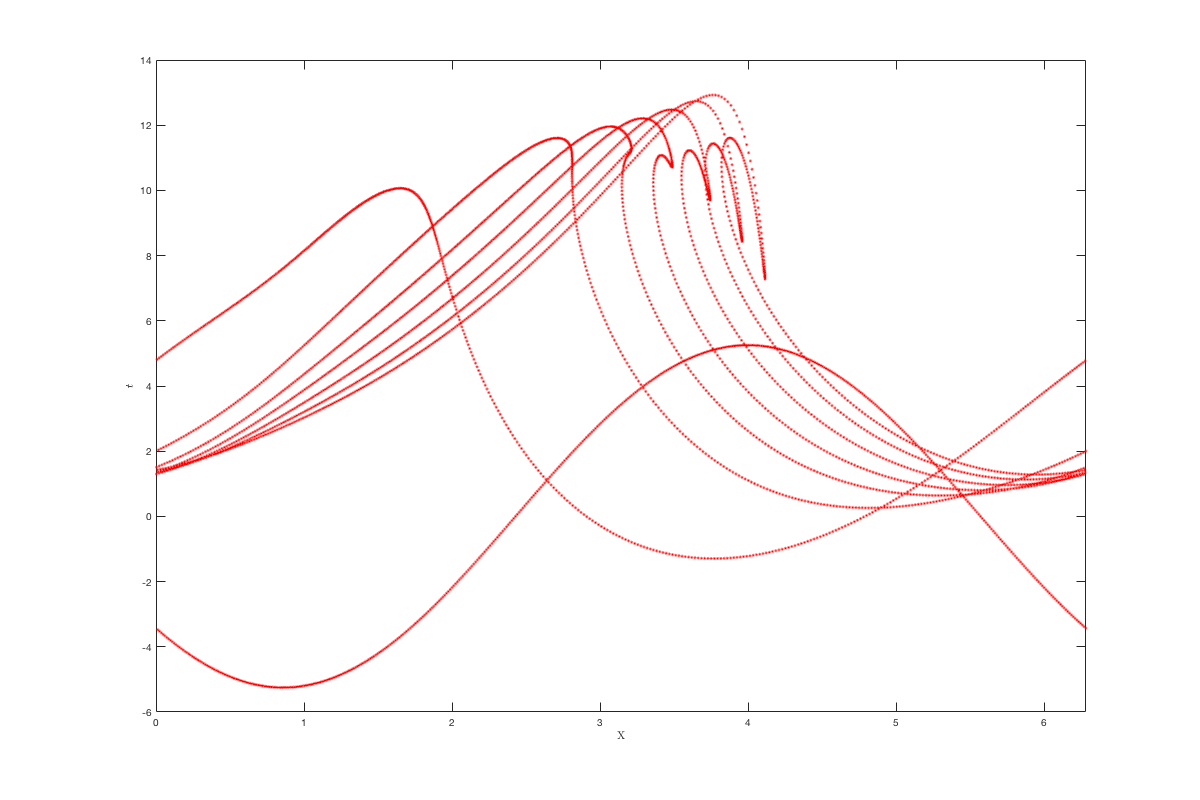

In [124]:
%%
clf
set(gca,'fontsize',28)
for i=1:15:length(t)
plot(mod(4+x_o(:,i),2*pi),t(i)+15*y_o(:,i),'.r')
hold on
xlim([0 2*pi])
end
% set(gca,'fontsize',28)
xlabel('X','interpreter','latex')
ylabel('$t$','interpreter','latex')
set(gcf, 'Position',  [100, 100, 1200, 800])
set(gcf,'color','w');

In [125]:
%% compute velocity 
u = zeros(N,length(t));
v = zeros(N,length(t));
for i = 1:N
   u(i,:) = gradient(x_o(i,:))./gradient(t');
   v(i,:) = gradient(y_o(i,:))./gradient(t');
end 
% compute accelerations 
ax = u; ay = u;
for i=1:N
    ax(i,:)=gradient(u(i,:))./gradient(t');
    ay(i,:)=gradient(v(i,:))./gradient(t');
end

In [167]:
%% find phase speed of max, max slope, max curvature
m = zeros(length(t),1);
ind = m;
xm = m; mx = m; indx = m;
xsm = xm; um = m; usm = m;
for i=1:length(t)
    
    [m(i),ind(i)]=max(y_o(:,i));
    
    xm(i,1)=x_o(ind(i),i);
    
    um(i,1)=u(ind(i),i);
    
    [mx(i), indx(i)] = min((gradient(y_o(:,i))./...
    gradient(x_o(:,i))));

    xsm(i,1)=x_o(indx(i),i);
    
    usm(i,1)=u(indx(i),i);
end

Array indices must be positive integers or logical values.


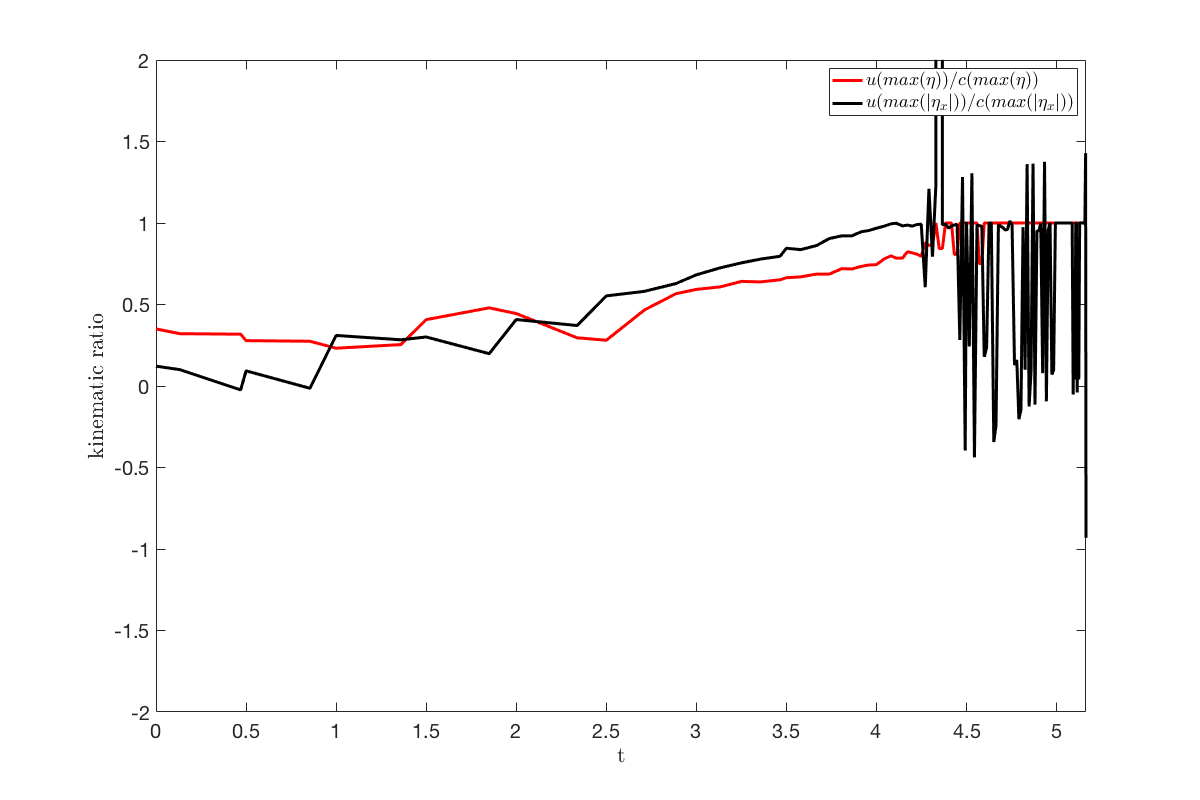

In [127]:
%% look at the ratios of u/c
cm=gradient(unwrap(xm))./gradient(t);
cmx=gradient(unwrap(xsm))./gradient(t);
clf
p1=plot(t,um./cm,'r','linewidth',3);
hold on
p2=plot(t,usm./cmx,'k','linewidth',3);
ylim([-2 2])
xlim([0 max(t)])
set(gca,'fontsize',20)
xlabel('t','interpreter','latex')
ylabel('kinematic ratio','interpreter','latex')
set(gcf, 'Position',  [100, 100, 1200, 800])
set(gcf,'color','w');
l1=legend([p1 p2],'$u(max(\eta))/c(max(\eta))$',...
    '$u(max(|\eta_x|))/c(max(|\eta_x|))$');
set(l1,'interpreter','latex')

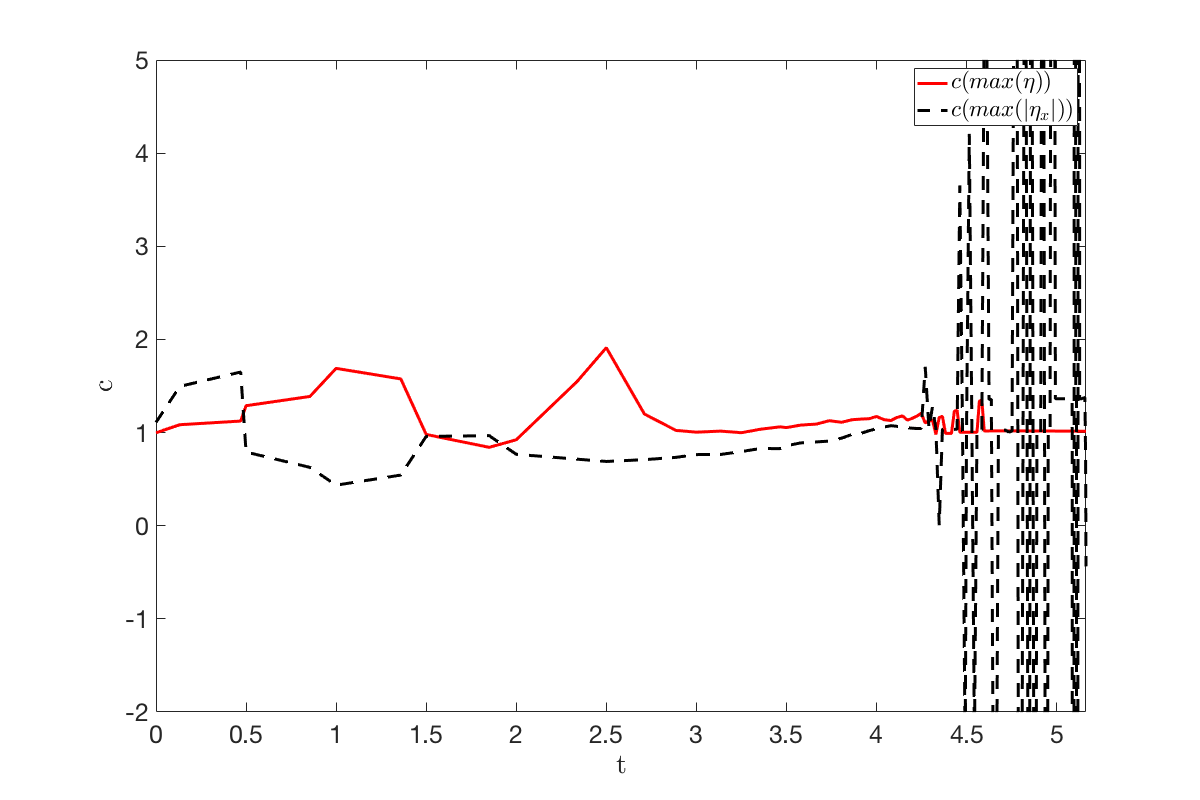

In [128]:
%% look at c
cm=gradient(unwrap(xm))./gradient(t);
cmx=gradient(unwrap(xsm))./gradient(t);
clf
p1=plot(t,cm,'r','linewidth',3);
hold on
p2=plot(t,cmx,'--k','linewidth',3);
ylim([-2 5])
xlim([0 max(t)])
set(gca,'fontsize',25)
xlabel('t','interpreter','latex')
ylabel('c','interpreter','latex')
set(gcf, 'Position',  [100, 100, 1200, 800])
set(gcf,'color','w');
l1=legend([p1 p2],'$c(max(\eta))$',...
    '$c(max(|\eta_x|))$');
set(l1,'interpreter','latex')

Homework: Figure out how to despike data. See if the spikes get better or worse as resolution increases.
---

In [198]:
%% find phase speed of max, max slope, max curvature
m = zeros(length(t),1);
ind = m;
xm = m; mx = m; indx = m;
xsm = xm; um = m; usm = m;
for i=1:length(t)
    
    [m(i),ind(i)]=max(y_o(:,i));
    
    xm(i,1)=x_o(ind(i),i);
    
    um(i,1)=u(ind(i),i);
    
    [mx(i), indx(i)] = min((gradient(y_o(:,i))./...
    gradient(x_o(:,i))));

    xsm(i,1)=x_o(indx(i),i);
    
    usm(i,1)=u(indx(i),i);
end

Array indices must be positive integers or logical values.


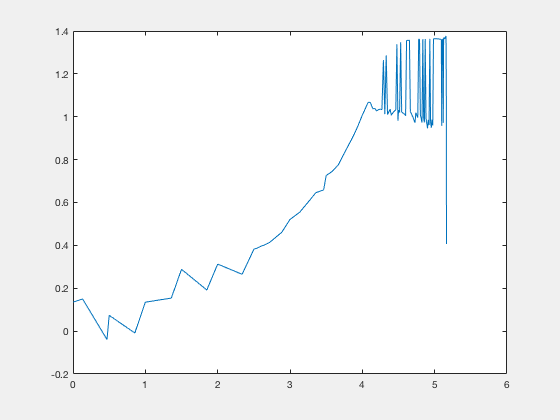

In [148]:
plot(t,usm)

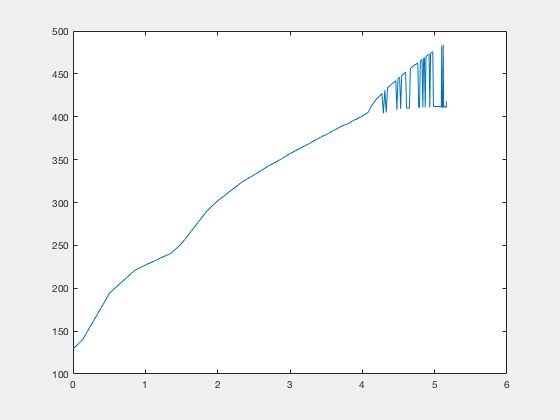

In [147]:
plot(t,indx)

In [149]:
indx


indx =

   129
   140
   189
   194
   221
   227
   241
   252
   290
   302
   324
   332
   343
   351
   357
   363
   368
   373
   378
   379
   383
   387
   390
   392
   395
   397
   399
   401
   403
   405
   410
   415
   418
   421
   423
   425
   427
   404
   431
   405
   434
   435
   436
   438
   439
   440
   441
   442
   408
   445
   445
   446
   409
   448
   449
   450
   451
   452
   410
   410
   410
   410
   456
   457
   458
   459
   460
   461
   461
   462
   463
   411
   411
   465
   466
   467
   411
   468
   469
   411
   470
   471
   472
   472
   473
   411
   474
   475
   475
   476
   412
   412
   412
   412
   412
   412
   412
   412
   412
   412
   412
   412
   412
   412
   412
   483
   411
   411
   411
   411
   484
   411
   413
   411
   411
   412
   411
   411
   411
   418



In [227]:
for i=1:length(t)
    for j=511:-1:1
        if (x_o(j,i)>x_o(j+1,i))
            end_crest(i)=j;
            break
        end
    end
end

This creates a new variable called end_crest that finds the lower bound of the area we want to look for the largest slope in.

In [154]:
x_o(512,120)


ans =

    6.3938



In [156]:
x_o(511,120)


ans =

    6.3800



In [157]:
x_o(400,120)


ans =

    6.4732



In [222]:
for i=1:length(t)
    
    
    grad=((gradient(y_o(:,i))./gradient(x_o(:,i))));
    [mx(i), indx(i)] = min(grad(end_crest(i)+1:512));
    indx(i)=indx(i)+end_crest(i);
    xsm(i,1)=x_o(indx(i),i);
    usm(i,1)=u(indx(i),i);
    
end

This finds the new largest slopes.

In [221]:
indx


indx =

   129
   140
   189
   194
   221
   227
   241
   252
   290
   302
   324
   332
   343
   351
   357
   363
   368
   373
   378
   379
   383
   387
   390
   392
   395
   397
   399
   401
   403
   405
   410
   415
   418
   421
   423
   425
   427
   429
   431
   432
   434
   435
   436
   438
   439
   440
   441
   442
   444
   445
   445
   446
   447
   448
   449
   450
   451
   452
   453
   454
   455
   456
   456
   457
   458
   459
   460
   461
   461
   462
   463
   464
   465
   465
   466
   467
   468
   468
   469
   470
   470
   471
   472
   472
   473
   474
   474
   475
   475
   476
   477
   477
   478
   478
   479
   479
   480
   480
   481
   481
   482
   482
   482
   483
   483
   483
   484
   484
   484
   484
   484
   485
   485
   485
   486
   486
   486
   487
   487
   487



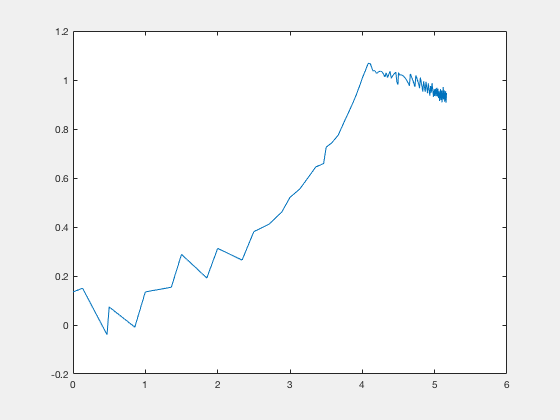

In [223]:
plot(t,usm)

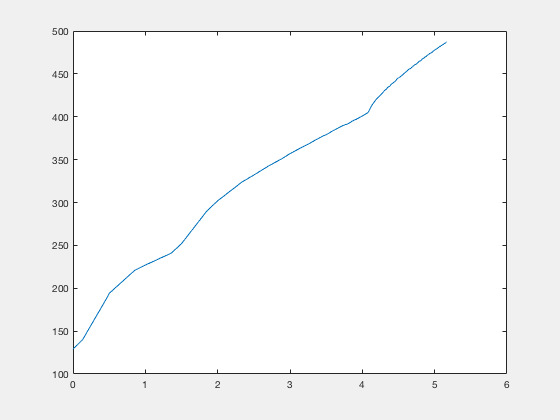

In [224]:
plot(t,indx)